In [1]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler

In [1]:
import os
import zipfile
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from glob import glob

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # correct import for one-hot-encoding

from keras import layers
from keras import Model, Input
from keras.applications.densenet import DenseNet201

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Removing the unused import
# import torchvision.models as models

%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="zFQnSt2437Ig6aCAtSZ4", model_format="clip")
dataset = rf.workspace("yulia-pratiwi-45vut").project("derma").version(1).download(location="/content/Dermalysis")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/Dermalysis in clip:: 100%|██████████| 3495/3495 [00:00<00:00, 3559.40it/s]


In [3]:
import os
os.chdir('/content/Dermalysis')

In [4]:
#
import os
folder_path = ('/content/Dermalysis/train/CacarAir')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [5]:
import os
folder_path = ('/content/Dermalysis/train/JamurKuku')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [6]:
import os
folder_path = ('/content/Dermalysis/train/Jerawat')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [7]:
import os
folder_path = ('/content/Dermalysis/train/Kurap')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [8]:
import os
folder_path = ('/content/Dermalysis/train/KutuAir')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [9]:
#cek label
from pathlib import Path
image_dir = Path('/content/Dermalysis/train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [12]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(10)

Filepath      Label
0  /content/Dermalysis/train/Kurap/86_FU-ringworm...      Kurap
1  /content/Dermalysis/train/KutuAir/FU-athlete-f...    KutuAir
2  /content/Dermalysis/train/JamurKuku/308_JPG_jp...  JamurKuku
3  /content/Dermalysis/train/KutuAir/FU-athlete-f...    KutuAir
4  /content/Dermalysis/train/JamurKuku/11_png_jpg...  JamurKuku
5  /content/Dermalysis/train/KutuAir/23-6-_jpeg_j...    KutuAir
6  /content/Dermalysis/train/Kurap/ringworm-1257-...      Kurap
7  /content/Dermalysis/train/CacarAir/chickenpox_...   CacarAir
8  /content/Dermalysis/train/JamurKuku/_41_7282_j...  JamurKuku
9  /content/Dermalysis/train/KutuAir/23-8-_jpg.rf...    KutuAir

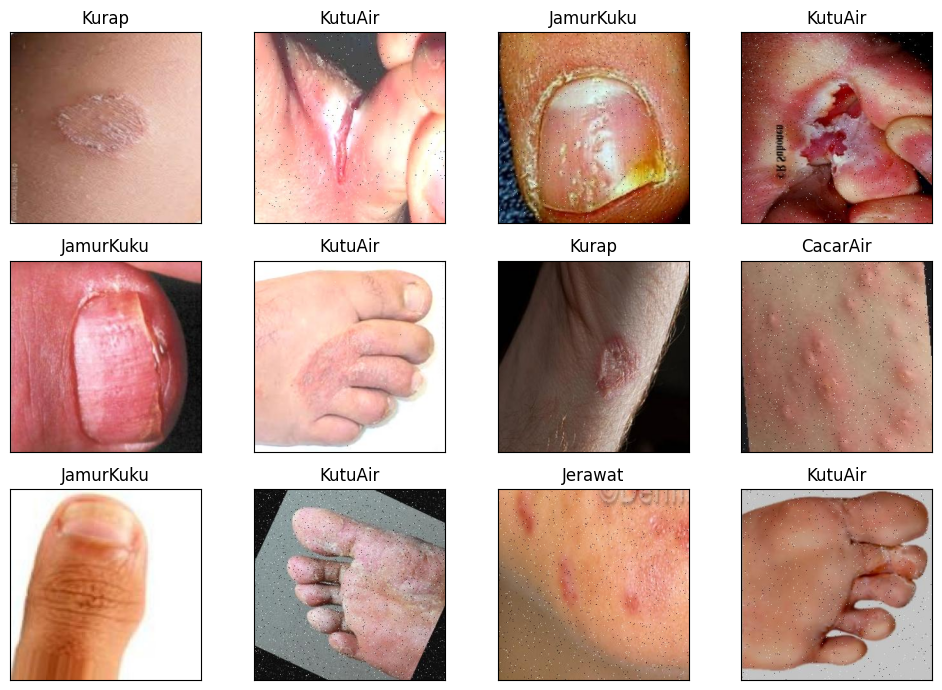

In [13]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



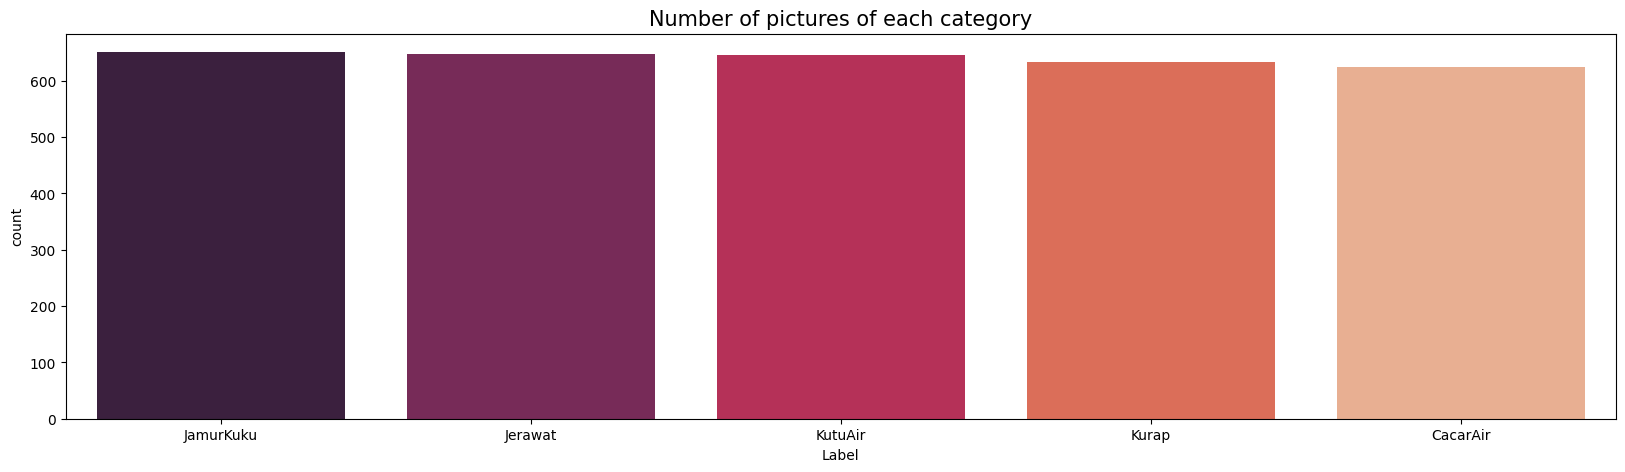

In [14]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [15]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, val_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [16]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(240,240),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=val_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(240,240),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )
# test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
#                                         x_col='Filepath',
#                                         y_col='Label',
#                                          seed=0,
#                                          target_size=(416,416),
#                                          batch_size=16,
#                                          shuffle=False,
#                                          class_mode = 'categorical',
#                                          )

Found 2560 validated image filenames belonging to 5 classes.
Found 641 validated image filenames belonging to 5 classes.


In [17]:
from keras import Model, Input
input_shape = (240,240,3)
model_input = Input(shape=input_shape)

In [18]:
from tensorflow.keras.applications import MobileNetV2
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import Adam

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import torchvision.models as models
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
import tensorflow as tf
# from tensorflow.keras.applications import ResNet50    # underfit
# from tensorflow.keras.applications import ResNet152V2 # overfit
model3 = tf.keras.models.Sequential([
    MobileNetV2(weights="imagenet", include_top=False, input_tensor=model_input),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# model3.layers[0].trainable = False

9406464/9406464 [==============================] - 2s 0us/step


In [20]:
for layer in model3.layers[:-1]:
    layer.trainable=False

In [21]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.1 and logs.get('val_loss') < 0.1):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/Dermalysis/Percobaan-MobileNetV2/MobileNetV2-1024-0.1.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [24]:
callbacks = myCallback()
optimizer = Adam(learning_rate=0.0001)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 5)                 2

In [25]:
mobilenetv2_history = model3.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/16,
                  validation_steps=validasi_data.n/16,
                  epochs=100,
                  callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/100
160/160 [==============================] - ETA: 0s - loss: 1.6757 - accuracy: 0.2059
Epoch 1: loss improved from inf to 1.67573, saving model to /content/Dermalysis/Percobaan-MobileNetV2/MobileNetV2-1024-0.1.h5


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


160/160 [==============================] - 58s 320ms/step - loss: 1.6757 - accuracy: 0.2059 - val_loss: 1.6244 - val_accuracy: 0.2044
Epoch 2/100
160/160 [==============================] - ETA: 0s - loss: 1.5652 - accuracy: 0.2965
Epoch 2: loss improved from 1.67573 to 1.56524, saving model to /content/Dermalysis/Percobaan-MobileNetV2/MobileNetV2-1024-0.1.h5
160/160 [==============================] - 52s 326ms/step - loss: 1.5652 - accuracy: 0.2965 - val_loss: 1.5468 - val_accuracy: 0.2808
Epoch 3/100
160/160 [==============================] - ETA: 0s - loss: 1.4943 - accuracy: 0.3520
Epoch 3: loss improved from 1.56524 to 1.49427, saving model to /content/Dermalysis/Percobaan-MobileNetV2/MobileNetV2-1024-0.1.h5
160/160 [==============================] - 50s 313ms/step - loss: 1.4943 - accuracy: 0.3520 - val_loss: 1.4743 - val_accuracy: 0.3526
Epoch 4/100
160/160 [==============================] - ETA: 0s - loss: 1.4296 - accuracy: 0.4059
Epoch 4: loss improved from 1.49427 to 1.42962,

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Tentukan path penyimpanan model
checkpoint_path = '/content/Dermalysis/Percobaan-MobileNetV2/MobileNetV2-1024-0.1.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [34]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.2 and logs.get('val_loss') > 0.96):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [35]:
model = load_model(checkpoint_path)

callbacks= myCallback()
model.fit(train_data, validation_data=validasi_data, epochs=10, callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 0.6755 - accuracy: 0.7539
Epoch 1: loss improved from inf to 0.67546, saving model to /content/Dermalysis/Percobaan-MobileNetV2/MobileNetV2-1024-0.1.h5
160/160 [==============================] - 54s 326ms/step - loss: 0.6755 - accuracy: 0.7539 - val_loss: 0.6477 - val_accuracy: 0.7676
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.7613
Epoch 2: loss improved from 0.67546 to 0.66679, saving model to /content/Dermalysis/Percobaan-MobileNetV2/MobileNetV2-1024-0.1.h5
160/160 [==============================] - 52s 323ms/step - loss: 0.6668 - accuracy: 0.7613 - val_loss: 0.6391 - val_accuracy: 0.7644
Epoch 3/10
160/160 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.7516
Epoch 3: loss did not improve from 0.66679
160/160 [==============================] - 48s 302ms/step - loss: 0.6836 - accuracy: 0.7516 - val_loss: 0.6472 - val_accuracy: 0.7660
Epoch 4/10


In [36]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


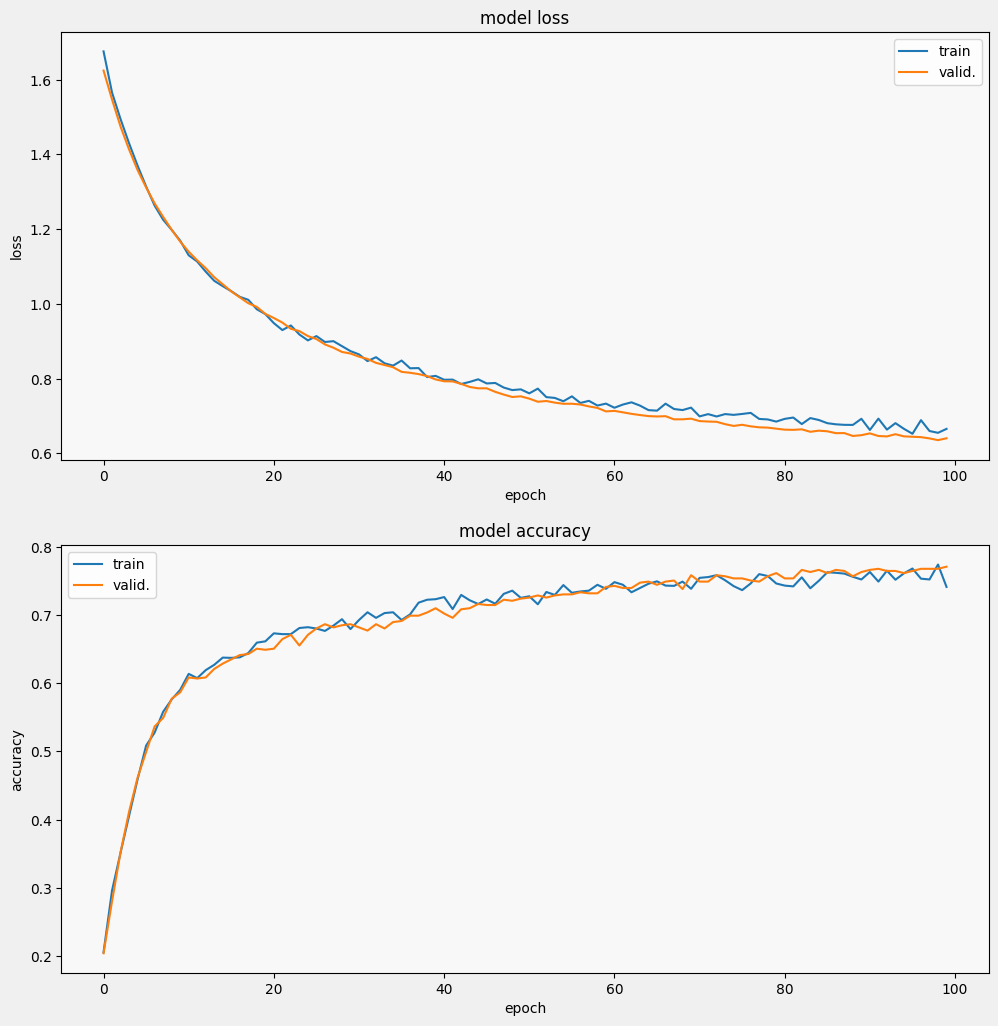

In [37]:
#display
display_training_curves(
    mobilenetv2_history.history['loss'],
    mobilenetv2_history.history['val_loss'],
    'loss', 211)
display_training_curves(
    mobilenetv2_history.history['accuracy'],
    mobilenetv2_history.history['val_accuracy'],
    'accuracy', 212)

In [38]:
# Predict the label of the test_images
import numpy as np
pred = model3.predict(validasi_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (validasi_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 10 predictions: {pred[:10]}')

41/41 [==============================] - 2s 36ms/step
The first 10 predictions: ['CacarAir', 'JamurKuku', 'JamurKuku', 'KutuAir', 'KutuAir', 'CacarAir', 'CacarAir', 'JamurKuku', 'Kurap', 'Jerawat']


In [39]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(val_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    CacarAir       0.74      0.72      0.73       120
   JamurKuku       0.75      0.90      0.82       134
     Jerawat       0.83      0.58      0.68       116
       Kurap       0.65      0.78      0.71       130
     KutuAir       0.92      0.84      0.88       141

    accuracy                           0.77       641
   macro avg       0.78      0.76      0.76       641
weighted avg       0.78      0.77      0.77       641



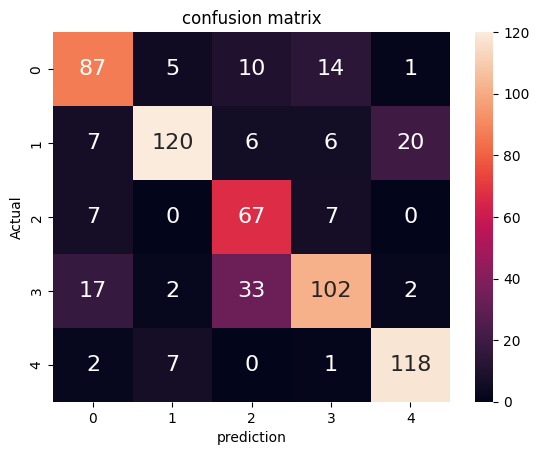

In [40]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(5)],
                  columns = [i for i in range(5)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

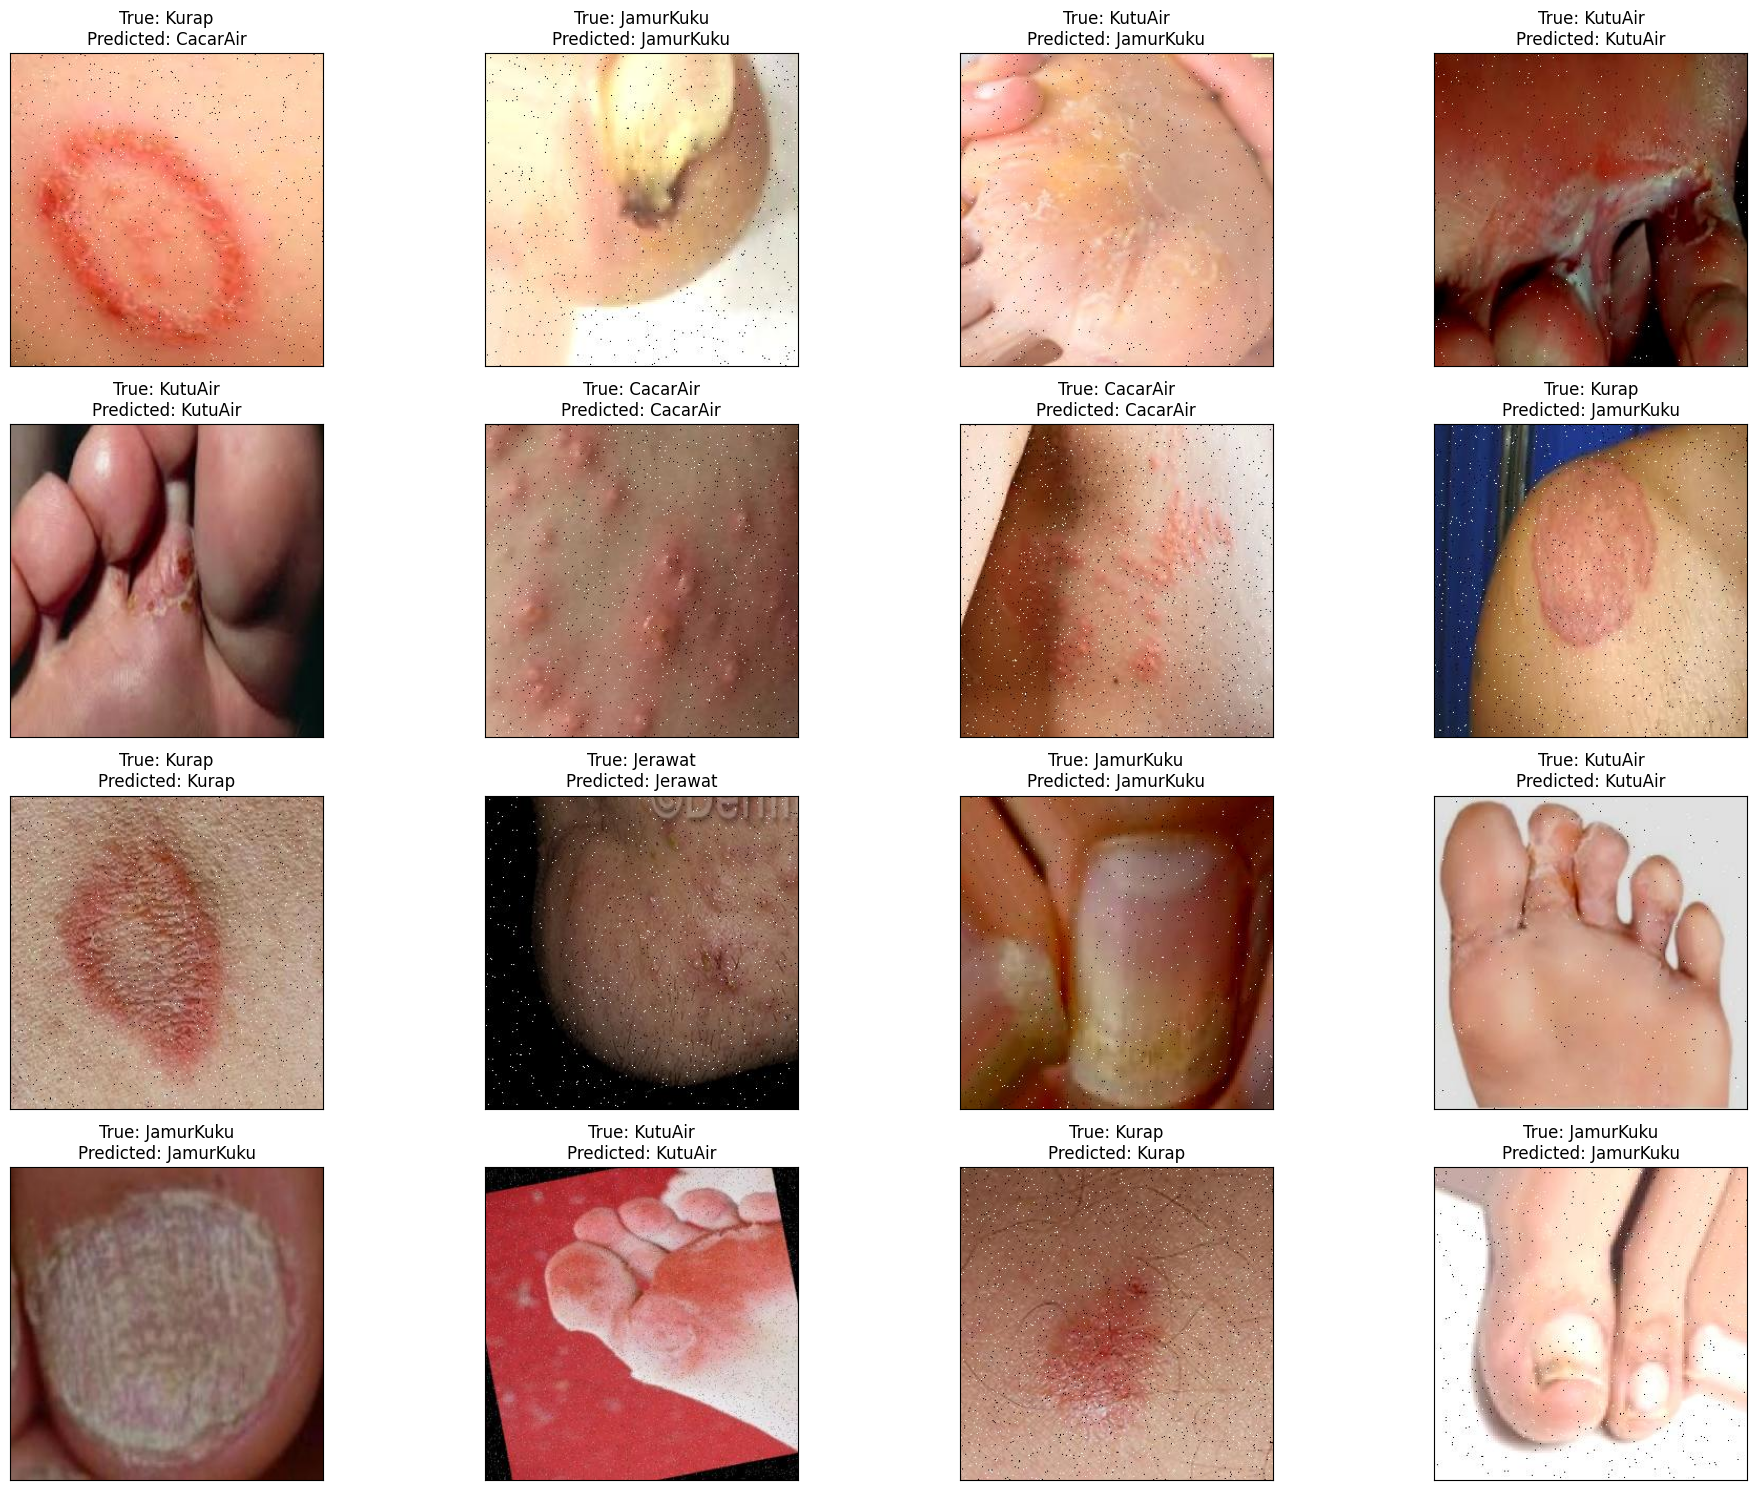

In [44]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(val_df.Filepath.iloc[i]))
    ax.set_title(f"True: {val_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [43]:
from google.colab import files
MODEL_BASE_PATH = "/content/Dermalysis"
PROJECT_NAME = "Percobaan-ResNet50"
SAVE_MODEL_NAME = "Final100-ResNet-512-01.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
model3.save(save_model_path,include_optimizer=False)
files.download(save_model_path)

Saving Model At /content/Dermalysis/Percobaan-ResNet50/Final100-ResNet-512-01.h5...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>